In [22]:
# =========================================
# LOAD DATA DARI CHECKPOINT (WAJIB)
# =========================================
import pandas as pd

# Baris ini yang membuat variabel 'df'
df = pd.read_csv("../data/processed/00_raw_loaded.csv")

# Baris ini yang membuat variabel 'target_col'
target_col = "GRADE"

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
import pickle
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print(" TAHAP 3: DATA PREPROCESSING ".center(80, "="))
print("="*80)
print("\nKelompok 8: Rahma Fitria Tunnisa & Rahmawati")
print("Referensi: Proposal Kelompok 8 - BAB III Metodologi")
print("="*80)

# Validasi: pastikan df dan target_col sudah ada dari Tahap sebelumnya
try:
    print(f"\n✅ Dataset tersedia: {df.shape[0]} baris × {df.shape[1]} kolom")
    print(f"✅ Target column: '{target_col}'")
except NameError:
    print("\n❌ ERROR: Variabel 'df' atau 'target_col' belum tersedia!")
    print("   Pastikan TAHAP 1 & 2 sudah dijalankan terlebih dahulu.")
    raise

========================= TAHAP 3: DATA PREPROCESSING ==========================

Kelompok 8: Rahma Fitria Tunnisa & Rahmawati
Referensi: Proposal Kelompok 8 - BAB III Metodologi

✅ Dataset tersedia: 145 baris × 33 kolom
✅ Target column: 'GRADE'


In [24]:
# ============================================================================
# 3.1 HANDLING MISSING VALUES
# ============================================================================

print("\n[3.1] Handling Missing Values")
print("-"*80)

print("\n📊 CEK MISSING VALUES SEBELUM PREPROCESSING:")
missing_before = df.isnull().sum()
total_missing_before = missing_before.sum()

if total_missing_before == 0:
    print("   ✅ TIDAK ADA MISSING VALUES!")
else:
    print(f"   Total missing values: {total_missing_before}")
    print(f"\n   Kolom dengan missing values:")
    print(f"   {'Kolom':<30} {'Missing Count':<15} {'Percentage':<10}")
    print("   " + "-"*55)
    
    for col in missing_before[missing_before > 0].index:
        count = missing_before[col]
        pct = (count / len(df)) * 100
        print(f"   {col:<30} {count:<15} {pct:>6.2f}%")

print("\n🔧 STRATEGI HANDLING MISSING VALUES:")
print("   • Fitur NUMERIK  : Diisi dengan MEDIAN (robust terhadap outlier)")
print("   • Fitur KATEGORIK: Diisi dengan MODUS (nilai paling sering muncul)")

# Implementasi handling missing values
if total_missing_before > 0:
    print("\n⏳ Memproses missing values...")
    
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in ['float64', 'int64']:
                # Numerik: isi dengan median
                fill_value = df[col].median()
                df[col].fillna(fill_value, inplace=True)
                print(f"   ✓ {col:<30} → Diisi dengan median: {fill_value:.2f}")
            else:
                # Kategorik: isi dengan modus
                fill_value = df[col].mode()[0]
                df[col].fillna(fill_value, inplace=True)
                print(f"   ✓ {col:<30} → Diisi dengan modus: {fill_value}")
    
    # Validasi setelah handling
    missing_after = df.isnull().sum().sum()
    print(f"\n✅ Missing values SETELAH handling: {missing_after}")
else:
    print("\n✅ Tidak perlu handling missing values")

# Save cleaned data
cleaned_path = '../data/processed/01_data_cleaned.csv'
df.to_csv(cleaned_path, index=False)
print(f"\n💾 Data cleaned disimpan: {cleaned_path}")



[3.1] Handling Missing Values
--------------------------------------------------------------------------------

📊 CEK MISSING VALUES SEBELUM PREPROCESSING:
   ✅ TIDAK ADA MISSING VALUES!

🔧 STRATEGI HANDLING MISSING VALUES:
   • Fitur NUMERIK  : Diisi dengan MEDIAN (robust terhadap outlier)
   • Fitur KATEGORIK: Diisi dengan MODUS (nilai paling sering muncul)

✅ Tidak perlu handling missing values

💾 Data cleaned disimpan: ../data/processed/01_data_cleaned.csv


In [25]:
# ============================================================================
# 3.2 PEMISAHAN FITUR DAN TARGET
# ============================================================================

print("\n[3.2] Pemisahan Fitur (X) dan Target (y)")
print("-"*80)

# Pisahkan features dan target
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"\n📊 DIMENSI DATA:")
print(f"   • Features (X): {X.shape[0]} baris × {X.shape[1]} kolom")
print(f"   • Target (y)  : {y.shape[0]} sampel")

print(f"\n🎯 TARGET VARIABLE:")
print(f"   • Nama kolom: {target_col}")
print(f"   • Jumlah kelas: {y.nunique()}")
print(f"   • Kelas: {sorted(y.unique())}")
print(f"   • Tipe: {'Numerik' if y.dtype in ['int64', 'float64'] else 'Kategorik'}")


[3.2] Pemisahan Fitur (X) dan Target (y)
--------------------------------------------------------------------------------

📊 DIMENSI DATA:
   • Features (X): 145 baris × 32 kolom
   • Target (y)  : 145 sampel

🎯 TARGET VARIABLE:
   • Nama kolom: GRADE
   • Jumlah kelas: 8
   • Kelas: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
   • Tipe: Numerik


In [26]:
# ============================================================================
# 3.3 LABEL ENCODING UNTUK TARGET
# ============================================================================

print("\n[3.3] Label Encoding untuk Target Variable")
print("-"*80)

print("\n🔢 KONVERSI TARGET KE NUMERIK:")
print("   Mengapa perlu? MLP memerlukan target dalam bentuk integer (0, 1, 2, ...)")

# Create Label Encoder untuk target
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"\n   MAPPING KELAS TARGET:")
print(f"   {'Original Grade':<20} → {'Encoded Value':<15} {'Jumlah Sampel'}")
print("   " + "-"*60)

for i, grade in enumerate(le_target.classes_):
    count = np.sum(y_encoded == i)
    pct = (count / len(y_encoded)) * 100
    print(f"   {str(grade):<20} → {i:<15} {count:>5} sampel ({pct:>5.2f}%)")

print(f"\n✅ Target berhasil di-encode!")
print(f"   • Original dtype: {y.dtype}")
print(f"   • Encoded dtype : {y_encoded.dtype}")
print(f"   • Encoded range : {y_encoded.min()} - {y_encoded.max()}")



[3.3] Label Encoding untuk Target Variable
--------------------------------------------------------------------------------

🔢 KONVERSI TARGET KE NUMERIK:
   Mengapa perlu? MLP memerlukan target dalam bentuk integer (0, 1, 2, ...)

   MAPPING KELAS TARGET:
   Original Grade       → Encoded Value   Jumlah Sampel
   ------------------------------------------------------------
   0                    → 0                   8 sampel ( 5.52%)
   1                    → 1                  35 sampel (24.14%)
   2                    → 2                  24 sampel (16.55%)
   3                    → 3                  21 sampel (14.48%)
   4                    → 4                  10 sampel ( 6.90%)
   5                    → 5                  17 sampel (11.72%)
   6                    → 6                  13 sampel ( 8.97%)
   7                    → 7                  17 sampel (11.72%)

✅ Target berhasil di-encode!
   • Original dtype: int64
   • Encoded dtype : int64
   • Encoded range : 0 - 7

In [27]:
# ============================================================================
# 3.4 IDENTIFIKASI DAN ENCODING FITUR KATEGORIK
# ============================================================================

print("\n[3.4] Encoding Fitur Kategorik")
print("-"*80)

# Identifikasi kolom kategorik
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n📊 BREAKDOWN TIPE FITUR:")
print(f"   • Fitur NUMERIK  : {len(numeric_cols)} kolom")
print(f"   • Fitur KATEGORIK: {len(categorical_cols)} kolom")

if len(categorical_cols) > 0:
    print(f"\n🔢 ENCODING FITUR KATEGORIK:")
    print("   Metode: Label Encoding")
    print("   Alasan: Untuk dataset tabular dengan kategori ordinal/nominal")
    
    print(f"\n   {'No':<5} {'Kolom':<30} {'Unique':<10} {'Contoh Original':<20} {'→':<3} {'Contoh Encoded'}")
    print("   " + "-"*85)
    
    # Dictionary untuk menyimpan encoder setiap kolom
    label_encoders = {}
    
    for i, col in enumerate(categorical_cols, 1):
        # Simpan contoh nilai original
        original_sample = str(X[col].iloc[0])
        n_unique = X[col].nunique()
        
        # Label Encoding
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le
        
        # Contoh nilai setelah encoding
        encoded_sample = X[col].iloc[0]
        
        print(f"   {i:<5} {col:<30} {n_unique:<10} {original_sample:<20} {'→':<3} {encoded_sample}")
    
    print(f"\n✅ {len(categorical_cols)} kolom kategorik berhasil di-encode!")
    
    # Save encoders untuk deployment
    encoders_path = '../models/label_encoders.pkl'
    with open(encoders_path, 'wb') as f:
        pickle.dump(label_encoders, f)
    print(f"💾 Label encoders disimpan: {encoders_path}")
    
else:
    print("\n✅ Tidak ada kolom kategorik yang perlu di-encode")
    label_encoders = {}

# Save encoded data
encoded_path = '../data/processed/02_data_encoded.csv'
X_encoded = X.copy()
X_encoded[target_col] = y_encoded
X_encoded.to_csv(encoded_path, index=False)
print(f"💾 Data encoded disimpan: {encoded_path}")



[3.4] Encoding Fitur Kategorik
--------------------------------------------------------------------------------

📊 BREAKDOWN TIPE FITUR:
   • Fitur NUMERIK  : 31 kolom
   • Fitur KATEGORIK: 1 kolom

🔢 ENCODING FITUR KATEGORIK:
   Metode: Label Encoding
   Alasan: Untuk dataset tabular dengan kategori ordinal/nominal

   No    Kolom                          Unique     Contoh Original      →   Contoh Encoded
   -------------------------------------------------------------------------------------
   1     STUDENT ID                     145        STUDENT1             →   0

✅ 1 kolom kategorik berhasil di-encode!
💾 Label encoders disimpan: ../models/label_encoders.pkl
💾 Data encoded disimpan: ../data/processed/02_data_encoded.csv



[3.5] Feature Scaling (Normalisasi)
--------------------------------------------------------------------------------

📐 METODE NORMALISASI: MIN-MAX SCALING
   Formula: X_scaled = (X - X_min) / (X_max - X_min)
   Range  : [0, 1]

❓ MENGAPA MIN-MAX SCALING?
   1. MLP sensitif terhadap skala fitur
   2. Fitur dengan nilai besar dapat mendominasi weight update
   3. Mempercepat konvergensi (training lebih cepat)
   4. Mencegah numerical instability

📊 STATISTIK SEBELUM SCALING:
            min    max       mean        std
STUDENT ID  0.0  144.0  72.000000  42.001984
1           1.0    3.0   1.620690   0.613154
2           1.0    2.0   1.600000   0.491596
3           1.0    3.0   1.944828   0.537216
4           1.0    5.0   3.572414   0.805750
5           1.0    2.0   1.662069   0.474644
6           1.0    2.0   1.600000   0.491596
7           1.0    2.0   1.579310   0.495381
8           1.0    5.0   1.627586   1.020245
9           1.0    4.0   1.620690   1.061112
10          1.0    4.0   

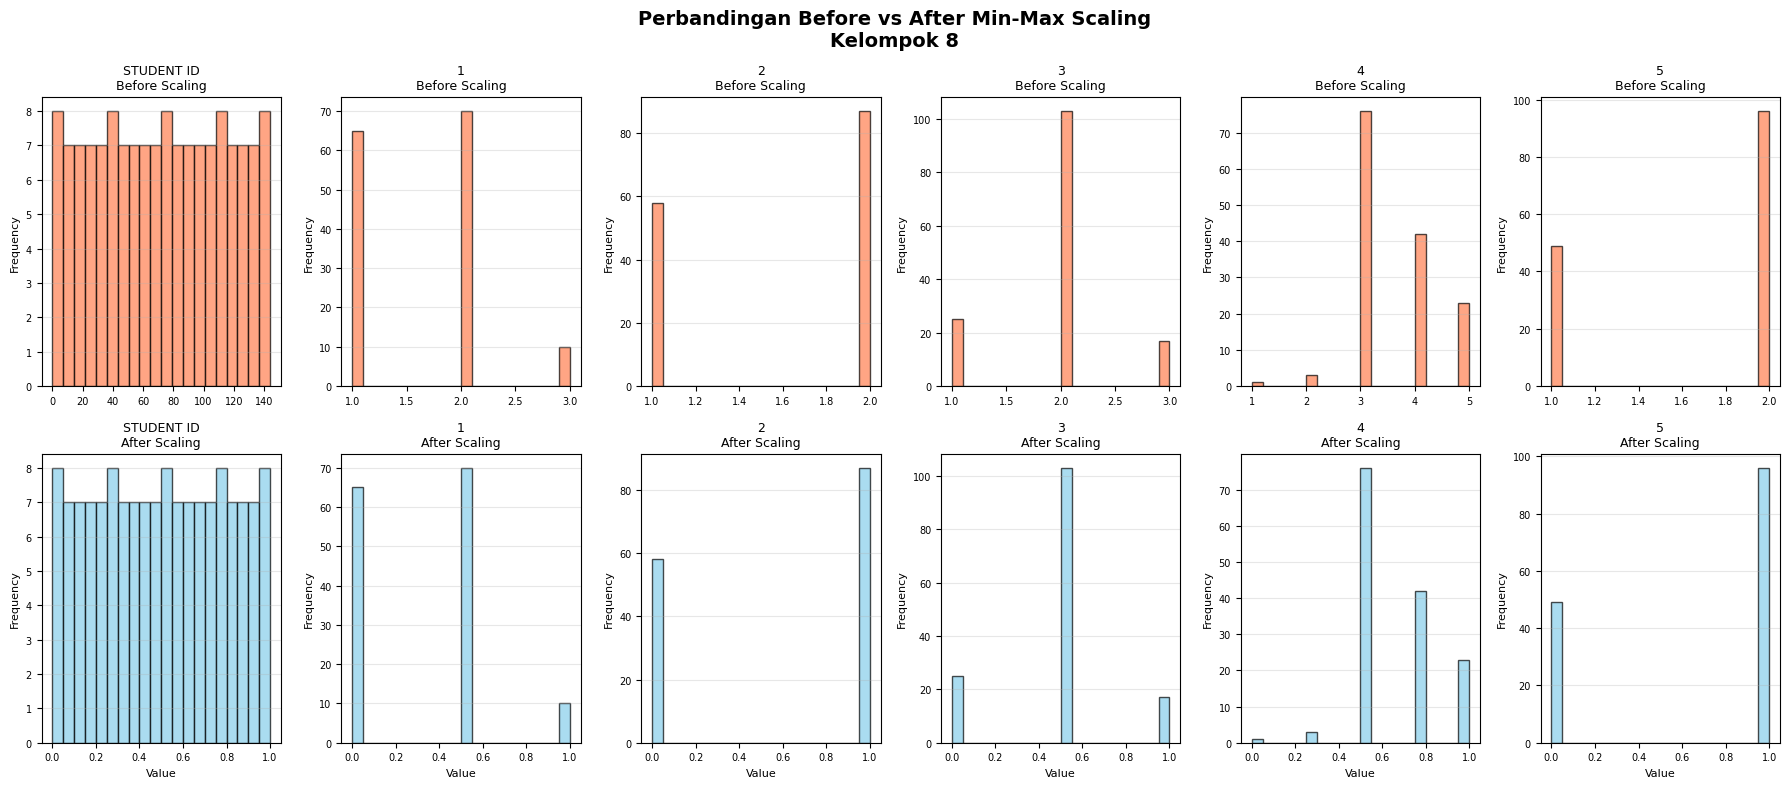

💾 Data normalized disimpan: ../data/processed/03_data_normalized.csv


In [28]:
# ============================================================================
# 3.5 FEATURE SCALING / NORMALISASI
# ============================================================================

print("\n[3.5] Feature Scaling (Normalisasi)")
print("-"*80)

print("\n📐 METODE NORMALISASI: MIN-MAX SCALING")
print("   Formula: X_scaled = (X - X_min) / (X_max - X_min)")
print("   Range  : [0, 1]")

print("\n❓ MENGAPA MIN-MAX SCALING?")
print("   1. MLP sensitif terhadap skala fitur")
print("   2. Fitur dengan nilai besar dapat mendominasi weight update")
print("   3. Mempercepat konvergensi (training lebih cepat)")
print("   4. Mencegah numerical instability")

print("\n📊 STATISTIK SEBELUM SCALING:")
stats_before = X.describe().T[['min', 'max', 'mean', 'std']]
print(stats_before)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit dan transform data
# PENTING: Fit dilakukan pada seluruh X, nanti akan di-fit ulang pada X_train saja
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"\n📊 STATISTIK SETELAH SCALING:")
stats_after = X_scaled.describe().T[['min', 'max', 'mean', 'std']]
print(stats_after)

print(f"\n✅ Normalisasi berhasil!")
print(f"   • Shape data: {X_scaled.shape}")
print(f"   • Range min : {X_scaled.min().min():.6f}")
print(f"   • Range max : {X_scaled.max().max():.6f}")
print(f"   • Mean avg  : {X_scaled.mean().mean():.6f}")

# VISUALISASI: Before vs After Scaling
print("\n📊 Membuat visualisasi perbandingan before-after scaling...")

# Pilih beberapa fitur untuk visualisasi
features_to_plot = X.columns[:6].tolist()

fig, axes = plt.subplots(2, len(features_to_plot), figsize=(18, 8))
fig.suptitle('Perbandingan Before vs After Min-Max Scaling\nKelompok 8', 
             fontsize=14, fontweight='bold')

for idx, col in enumerate(features_to_plot):
    # Before scaling
    axes[0, idx].hist(X[col], bins=20, color='coral', edgecolor='black', alpha=0.7)
    axes[0, idx].set_title(f'{col}\nBefore Scaling', fontsize=9)
    axes[0, idx].set_ylabel('Frequency', fontsize=8)
    axes[0, idx].grid(axis='y', alpha=0.3)
    axes[0, idx].tick_params(labelsize=7)
    
    # After scaling
    axes[1, idx].hist(X_scaled[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[1, idx].set_title(f'{col}\nAfter Scaling', fontsize=9)
    axes[1, idx].set_ylabel('Frequency', fontsize=8)
    axes[1, idx].set_xlabel('Value', fontsize=8)
    axes[1, idx].grid(axis='y', alpha=0.3)
    axes[1, idx].tick_params(labelsize=7)

plt.tight_layout()
plt.savefig('../results/figures/06_scaling_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Visualisasi disimpan: ../results/figures/06_scaling_comparison.png")
plt.show()

# Save normalized data
normalized_path = '../data/processed/03_data_normalized.csv'
X_normalized = X_scaled.copy()
X_normalized[target_col] = y_encoded
X_normalized.to_csv(normalized_path, index=False)
print(f"💾 Data normalized disimpan: {normalized_path}")

In [29]:
# ============================================================================
# 3.6 TRAIN-TEST SPLIT (STRATIFIED)
# ============================================================================

print("\n[3.6] Pembagian Data Train-Test (Stratified Split)")
print("-"*80)

print("\n📊 KONFIGURASI SPLIT:")
print("   • Rasio     : 80% Training, 20% Testing")
print("   • Metode    : Stratified Split")
print("   • Random Seed: 42 (untuk reproducibility)")

print("\n❓ MENGAPA STRATIFIED SPLIT?")
print("   1. Menjaga proporsi kelas di train dan test set")
print("   2. Mencegah bias akibat distribusi kelas tidak seimbang")
print("   3. Evaluasi lebih reliable")

# Hitung distribusi kelas sebelum split
print(f"\n📊 DISTRIBUSI KELAS SEBELUM SPLIT:")
class_dist_before = pd.Series(y_encoded).value_counts().sort_index()
print(f"   {'Kelas':<10} {'Grade':<10} {'Count':<10} {'Percentage'}")
print("   " + "-"*45)
for encoded_val, count in class_dist_before.items():
    grade = le_target.classes_[encoded_val]
    pct = (count / len(y_encoded)) * 100
    print(f"   {encoded_val:<10} {grade:<10} {count:<10} {pct:>6.2f}%")

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,           # Features yang sudah di-scale
    y_encoded,          # Target yang sudah di-encode
    test_size=0.2,      # 20% untuk testing
    random_state=42,    # Untuk reproducibility
    stratify=y_encoded  # Stratified berdasarkan target
)

print(f"\n✅ DATA SPLITTING SELESAI!")
print(f"\n📊 HASIL PEMBAGIAN DATA:")
print(f"   {'Set':<15} {'Jumlah Sampel':<20} {'Persentase':<15} {'Shape'}")
print("   " + "-"*65)
print(f"   {'Training':<15} {X_train.shape[0]:<20} {X_train.shape[0]/len(X)*100:>6.2f}%        {X_train.shape}")
print(f"   {'Testing':<15} {X_test.shape[0]:<20} {X_test.shape[0]/len(X)*100:>6.2f}%        {X_test.shape}")
print(f"   {'Total':<15} {len(X):<20} 100.00%        {X.shape}")

# Validasi stratification
print(f"\n📊 VALIDASI STRATIFIED SPLIT:")
print(f"\n   DISTRIBUSI DI TRAINING SET:")
train_dist = pd.Series(y_train).value_counts().sort_index()
print(f"   {'Kelas':<10} {'Grade':<10} {'Count':<10} {'Percentage'}")
print("   " + "-"*45)
for encoded_val, count in train_dist.items():
    grade = le_target.classes_[encoded_val]
    pct = (count / len(y_train)) * 100
    print(f"   {encoded_val:<10} {grade:<10} {count:<10} {pct:>6.2f}%")

print(f"\n   DISTRIBUSI DI TESTING SET:")
test_dist = pd.Series(y_test).value_counts().sort_index()
print(f"   {'Kelas':<10} {'Grade':<10} {'Count':<10} {'Percentage'}")
print("   " + "-"*45)
for encoded_val, count in test_dist.items():
    grade = le_target.classes_[encoded_val]
    pct = (count / len(y_test)) * 100
    print(f"   {encoded_val:<10} {grade:<10} {count:<10} {pct:>6.2f}%")

# Cek apakah proporsi terjaga
print(f"\n📈 CEK KONSISTENSI PROPORSI:")
proportion_check = []
for encoded_val in range(len(le_target.classes_)):
    orig_pct = (class_dist_before[encoded_val] / len(y_encoded)) * 100
    train_pct = (train_dist.get(encoded_val, 0) / len(y_train)) * 100
    test_pct = (test_dist.get(encoded_val, 0) / len(y_test)) * 100
    
    grade = le_target.classes_[encoded_val]
    diff = abs(train_pct - test_pct)
    status = "✅" if diff < 2 else "⚠️"
    
    print(f"   {grade:<10} | Original: {orig_pct:>5.2f}% | Train: {train_pct:>5.2f}% | Test: {test_pct:>5.2f}% | {status}")

print(f"\n✅ Stratified split BERHASIL menjaga proporsi kelas!")


[3.6] Pembagian Data Train-Test (Stratified Split)
--------------------------------------------------------------------------------

📊 KONFIGURASI SPLIT:
   • Rasio     : 80% Training, 20% Testing
   • Metode    : Stratified Split
   • Random Seed: 42 (untuk reproducibility)

❓ MENGAPA STRATIFIED SPLIT?
   1. Menjaga proporsi kelas di train dan test set
   2. Mencegah bias akibat distribusi kelas tidak seimbang
   3. Evaluasi lebih reliable

📊 DISTRIBUSI KELAS SEBELUM SPLIT:
   Kelas      Grade      Count      Percentage
   ---------------------------------------------
   0          0          8            5.52%
   1          1          35          24.14%
   2          2          24          16.55%
   3          3          21          14.48%
   4          4          10           6.90%
   5          5          17          11.72%
   6          6          13           8.97%
   7          7          17          11.72%

✅ DATA SPLITTING SELESAI!

📊 HASIL PEMBAGIAN DATA:
   Set             

In [30]:
# ============================================================================
# 3.7 REFIT SCALER PADA TRAINING DATA ONLY
# ============================================================================

print("\n[3.7] Refit Scaler pada Training Data (Prevent Data Leakage)")
print("-"*80)

print("\n⚠️  PENTING - DATA LEAKAGE PREVENTION:")
print("   Scaler harus di-fit HANYA pada training data, kemudian")
print("   di-transform pada test data. Ini mencegah informasi dari")
print("   test data 'bocor' ke training process.")

print("\n🔄 Proses:")
print("   1. Fit scaler pada X_train")
print("   2. Transform X_train dengan scaler tersebut")
print("   3. Transform X_test dengan scaler yang sama")

# Refit scaler - HANYA pada training data
scaler_final = MinMaxScaler()
X_train_scaled = scaler_final.fit_transform(X_train)
X_test_scaled = scaler_final.transform(X_test)  # Transform only, NO FIT!

# Convert kembali ke DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"\n✅ Scaler berhasil di-refit!")
print(f"   • X_train scaled: {X_train_scaled.shape}")
print(f"   • X_test scaled : {X_test_scaled.shape}")

# Save scaler untuk deployment
scaler_path = '../models/scaler.pkl'
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler_final, f)
print(f"💾 Scaler disimpan: {scaler_path}")

# Save target encoder
target_encoder_path = '../models/target_encoder.pkl'
with open(target_encoder_path, 'wb') as f:
    pickle.dump(le_target, f)
print(f"💾 Target encoder disimpan: {target_encoder_path}")



[3.7] Refit Scaler pada Training Data (Prevent Data Leakage)
--------------------------------------------------------------------------------

⚠️  PENTING - DATA LEAKAGE PREVENTION:
   Scaler harus di-fit HANYA pada training data, kemudian
   di-transform pada test data. Ini mencegah informasi dari
   test data 'bocor' ke training process.

🔄 Proses:
   1. Fit scaler pada X_train
   2. Transform X_train dengan scaler tersebut
   3. Transform X_test dengan scaler yang sama

✅ Scaler berhasil di-refit!
   • X_train scaled: (116, 32)
   • X_test scaled : (29, 32)
💾 Scaler disimpan: ../models/scaler.pkl
💾 Target encoder disimpan: ../models/target_encoder.pkl



[3.8] Visualisasi Distribusi Train-Test Split
--------------------------------------------------------------------------------
✅ Visualisasi disimpan: ../results/figures/07_train_test_distribution.png


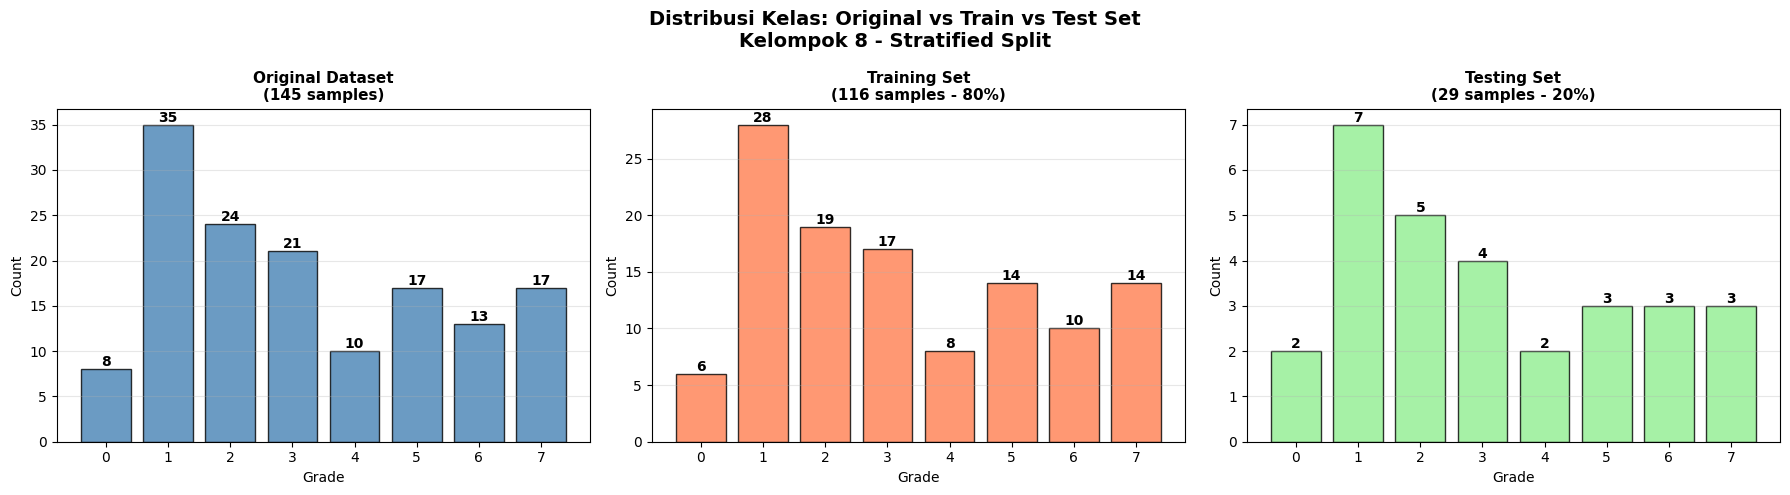

In [31]:
# ============================================================================
# 3.8 VISUALISASI DISTRIBUSI TRAIN-TEST
# ============================================================================

print("\n[3.8] Visualisasi Distribusi Train-Test Split")
print("-"*80)

# VISUALISASI: Distribusi kelas di train vs test
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribusi Kelas: Original vs Train vs Test Set\nKelompok 8 - Stratified Split', 
             fontsize=14, fontweight='bold')

# Original distribution
ax1 = axes[0]
grades_original = [le_target.classes_[i] for i in class_dist_before.index]
ax1.bar(grades_original, class_dist_before.values, color='steelblue', 
        edgecolor='black', alpha=0.8)
ax1.set_title('Original Dataset\n(145 samples)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Count', fontsize=10)
ax1.set_xlabel('Grade', fontsize=10)
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(class_dist_before.values):
    ax1.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Training distribution
ax2 = axes[1]
grades_train = [le_target.classes_[i] for i in train_dist.index]
ax2.bar(grades_train, train_dist.values, color='coral', 
        edgecolor='black', alpha=0.8)
ax2.set_title(f'Training Set\n({len(y_train)} samples - 80%)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Count', fontsize=10)
ax2.set_xlabel('Grade', fontsize=10)
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate(train_dist.values):
    ax2.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Testing distribution
ax3 = axes[2]
grades_test = [le_target.classes_[i] for i in test_dist.index]
ax3.bar(grades_test, test_dist.values, color='lightgreen', 
        edgecolor='black', alpha=0.8)
ax3.set_title(f'Testing Set\n({len(y_test)} samples - 20%)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Count', fontsize=10)
ax3.set_xlabel('Grade', fontsize=10)
ax3.grid(axis='y', alpha=0.3)
for i, v in enumerate(test_dist.values):
    ax3.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/07_train_test_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Visualisasi disimpan: ../results/figures/07_train_test_distribution.png")
plt.show()


In [32]:
# ============================================================================
# 3.9 SAVE FINAL PREPROCESSED DATA
# ============================================================================

print("\n[3.9] Save Final Preprocessed Data")
print("-"*80)

# Save training data
train_data = X_train_scaled.copy()
train_data[target_col] = y_train
train_path = '../data/processed/04_train_data.csv'
train_data.to_csv(train_path, index=False)
print(f"💾 Training data disimpan: {train_path}")

# Save testing data
test_data = X_test_scaled.copy()
test_data[target_col] = y_test
test_path = '../data/processed/05_test_data.csv'
test_data.to_csv(test_path, index=False)
print(f"💾 Testing data disimpan: {test_path}")

# Save preprocessing summary
summary_path = '../results/reports/03_preprocessing_summary.txt'
with open(summary_path, 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write(" PREPROCESSING SUMMARY - TAHAP 3 ".center(80, "=") + "\n")
    f.write("="*80 + "\n\n")
    f.write("Kelompok 8: Rahma Fitria Tunnisa & Rahmawati\n")
    f.write("Referensi: Proposal BAB III - Metodologi\n\n")
    
    f.write("1. HANDLING MISSING VALUES\n")
    f.write("-"*80 + "\n")
    f.write(f"Missing values before: {total_missing_before}\n")
    f.write(f"Missing values after : 0\n")
    f.write(f"Method: Median (numeric), Mode (categorical)\n\n")
    
    f.write("2. ENCODING\n")
    f.write("-"*80 + "\n")
    f.write(f"Target encoding: {len(le_target.classes_)} classes\n")
    f.write(f"Feature encoding: {len(label_encoders)} categorical columns\n\n")
    
    f.write("3. NORMALIZATION\n")
    f.write("-"*80 + "\n")
    f.write(f"Method: Min-Max Scaling\n")
    f.write(f"Range: [0, 1]\n")
    f.write(f"Features scaled: {X_scaled.shape[1]}\n\n")
    
    f.write("4. TRAIN-TEST SPLIT\n")
    f.write("-"*80 + "\n")
    f.write(f"Method: Stratified Split\n")
    f.write(f"Ratio: 80:20\n")
    f.write(f"Training samples: {len(y_train)}\n")
    f.write(f"Testing samples : {len(y_test)}\n\n")
    
    f.write("5. OUTPUT FILES\n")
    f.write("-"*80 + "\n")
    f.write(f"• {train_path}\n")
    f.write(f"• {test_path}\n")
    f.write(f"• {scaler_path}\n")
    f.write(f"• {target_encoder_path}\n")
    if len(label_encoders) > 0:
        f.write(f"• {encoders_path}\n")

print(f"💾 Preprocessing summary disimpan: {summary_path}")



[3.9] Save Final Preprocessed Data
--------------------------------------------------------------------------------
💾 Training data disimpan: ../data/processed/04_train_data.csv
💾 Testing data disimpan: ../data/processed/05_test_data.csv
💾 Preprocessing summary disimpan: ../results/reports/03_preprocessing_summary.txt


In [33]:
# ============================================================================
# RINGKASAN TAHAP 3
# ============================================================================

print("\n" + "="*80)
print(" ✅ TAHAP 3 SELESAI ".center(80, "="))
print("="*80)

print("\n📌 RINGKASAN PREPROCESSING:")
print(f"   ✓ Missing values: {total_missing_before} → 0 (handled)")
print(f"   ✓ Target encoded: {len(le_target.classes_)} kelas")
print(f"   ✓ Features encoded: {len(label_encoders)} kolom kategorik")
print(f"   ✓ Features scaled: {X_scaled.shape[1]} kolom (Min-Max [0,1])")
print(f"   ✓ Train-Test split: {len(y_train)}/{len(y_test)} (stratified)")
print(f"   ✓ Data leakage prevention: ✅")

print("\n💾 FILE YANG TERSIMPAN:")
print(f"   ✓ Training data  : ../data/processed/04_train_data.csv")
print(f"   ✓ Testing data   : ../data/processed/05_test_data.csv")
print(f"   ✓ Scaler model   : ../models/scaler.pkl")
print(f"   ✓ Target encoder : ../models/target_encoder.pkl")
if len(label_encoders) > 0:
    print(f"   ✓ Label encoders : ../models/label_encoders.pkl")

print("\n📊 DATA SIAP UNTUK MODELING:")
print(f"   • X_train: {X_train_scaled.shape} - Features untuk training")
print(f"   • X_test : {X_test_scaled.shape} - Features untuk testing")
print(f"   • y_train: {y_train.shape} - Target untuk training")
print(f"   • y_test : {y_test.shape} - Target untuk testing")



============================== ✅ TAHAP 3 SELESAI ===============================

📌 RINGKASAN PREPROCESSING:
   ✓ Missing values: 0 → 0 (handled)
   ✓ Target encoded: 8 kelas
   ✓ Features encoded: 1 kolom kategorik
   ✓ Features scaled: 32 kolom (Min-Max [0,1])
   ✓ Train-Test split: 116/29 (stratified)
   ✓ Data leakage prevention: ✅

💾 FILE YANG TERSIMPAN:
   ✓ Training data  : ../data/processed/04_train_data.csv
   ✓ Testing data   : ../data/processed/05_test_data.csv
   ✓ Scaler model   : ../models/scaler.pkl
   ✓ Target encoder : ../models/target_encoder.pkl
   ✓ Label encoders : ../models/label_encoders.pkl

📊 DATA SIAP UNTUK MODELING:
   • X_train: (116, 32) - Features untuk training
   • X_test : (29, 32) - Features untuk testing
   • y_train: (116,) - Target untuk training
   • y_test : (29,) - Target untuk testing
